In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [51]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
print(df.shape)

(7043, 21)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking data types in the dataset.

In [56]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Discribing data in numerical values.

In [57]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000




*    We can only see Senior citizen in here cause it is the only cloumn that is in integer form.
*   Mean monthly charges are 64.76 USD and 25% people pays 89USD.
*   75% of the costumer have tenure less then 55 month.






  

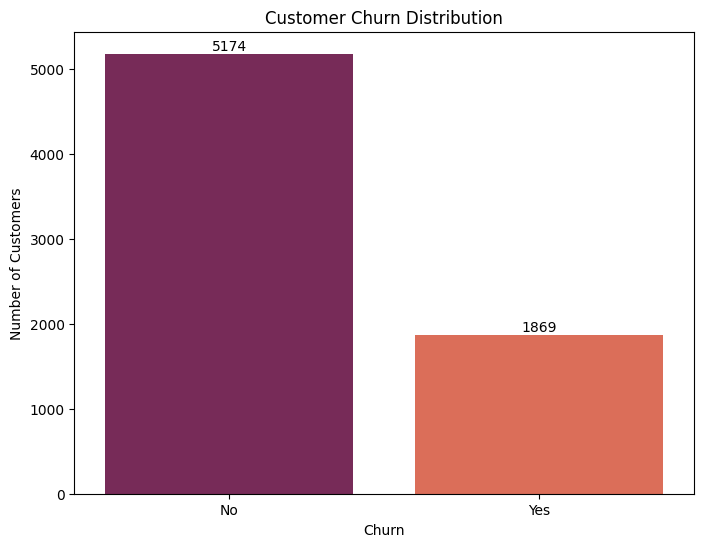

In [58]:
# Count the number of churners and non-churners
churn_counts = df['Churn'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='rocket')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')

# Add labels to the bars
for i, v in enumerate(churn_counts):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.show()


Counting the churner percentage.

In [59]:
100*df['Churn'].value_counts()/len(df)

,count
Churn,
No,73.463013
Yes,26.536987


Here we found that data is highly imbalanced Ratio is ~ 73:27.<br>
So we will analyse the data with other features while taking the target values separtely to get some insights.

**Missing Values**<br>
Here we can not see/find any missing values in the dataset. But if we have missing values in any other project we need to solve/treat that first before bulding the model.

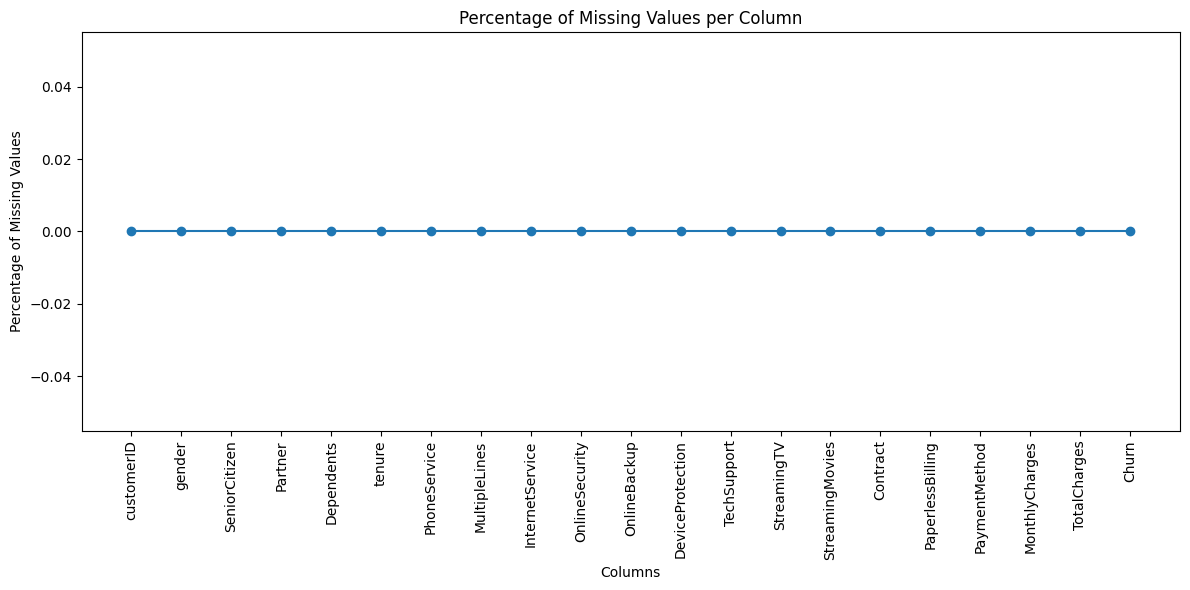

In [60]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() * 100 / len(df)

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(missing_percentage.index, missing_percentage.values, marker='o', linestyle='-')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values per Column')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Data Cleaning

In [61]:
# Create a copy of the DataFrame
df_copy = df.copy()


converting total charges from object into number format.

In [62]:
# df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'], errors='coerce')
# df_copy.isna().sum()

df_copy.TotalCharges = pd.to_numeric(df_copy.TotalCharges, errors='coerce')
df_copy.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [63]:
df_copy.loc[df_copy['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since the number of missing values is very low(11=.15%),we can ignore them

In [64]:
#removeing the missing values.
df_copy.dropna(how = 'any', inplace=True)
# we can also fill the missing values with 0
#df_copy.fillna(0, inplace=True)

Now we create Bins for costomers

In [65]:
print(df_copy['tenure'].max())

72


In [66]:
labels = ['{0} - {1}'.format(i, i + 11) for i in range(1, 72, 12)]

df_copy['tenure_group'] = pd.cut(df_copy.tenure, range(1, 80, 12), right=False, labels=labels)


In [67]:
df_copy['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


In [68]:
df_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [69]:
# Drop customerID and tenure columns
df_copy = df_copy.drop(['customerID', 'tenure'], axis=1)

# Display the head of the modified DataFrame
print(df_copy.head())


   gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling

## Data Exploration

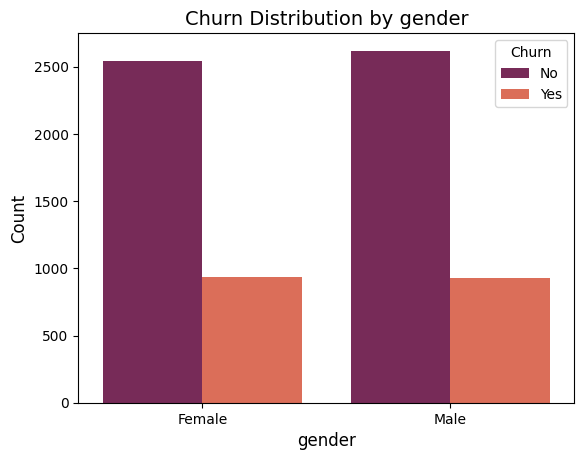

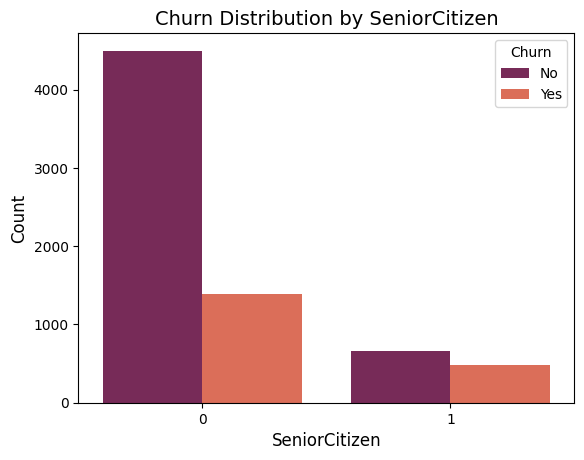

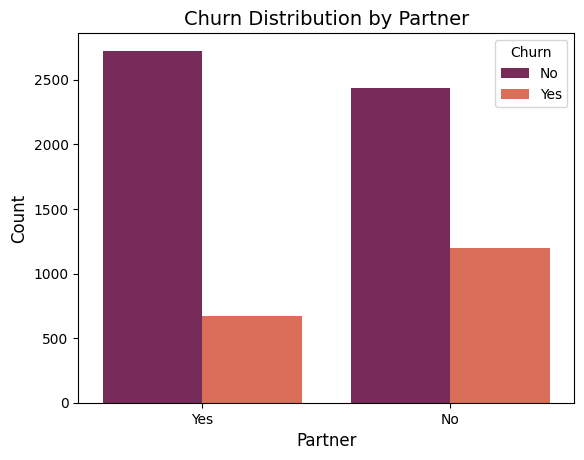

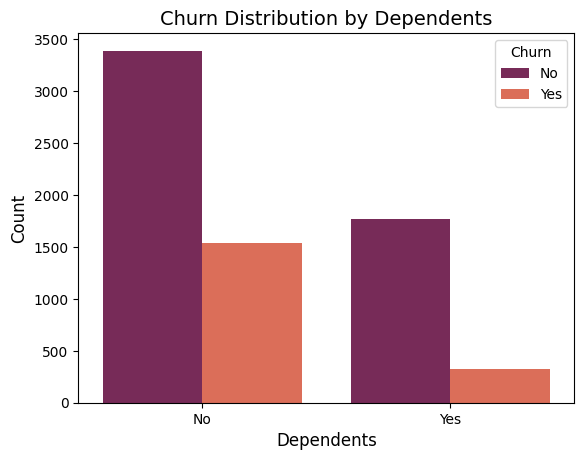

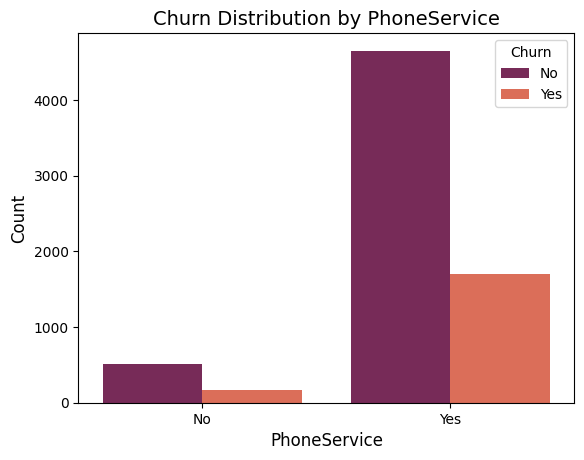

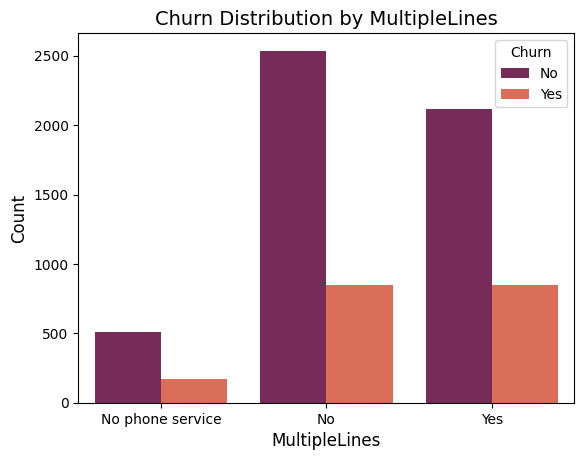

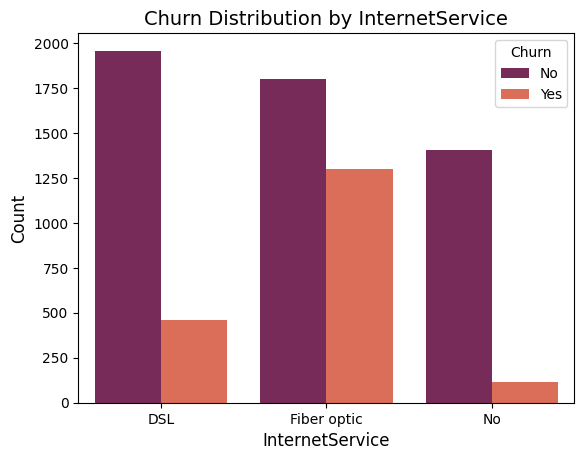

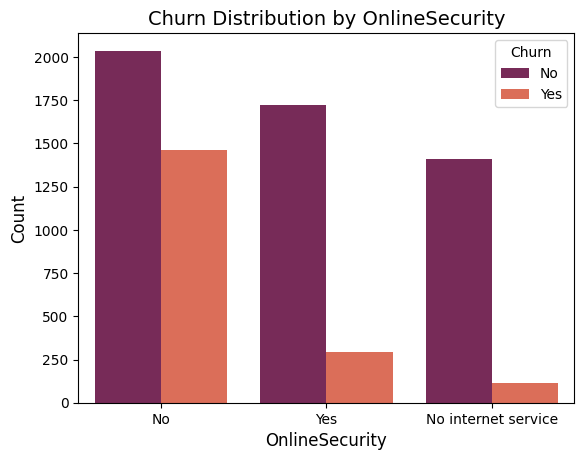

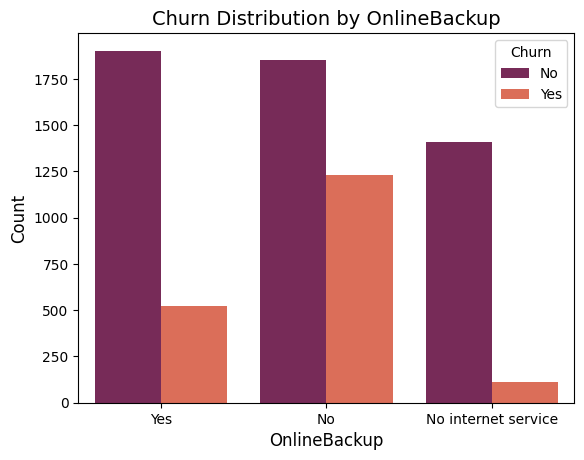

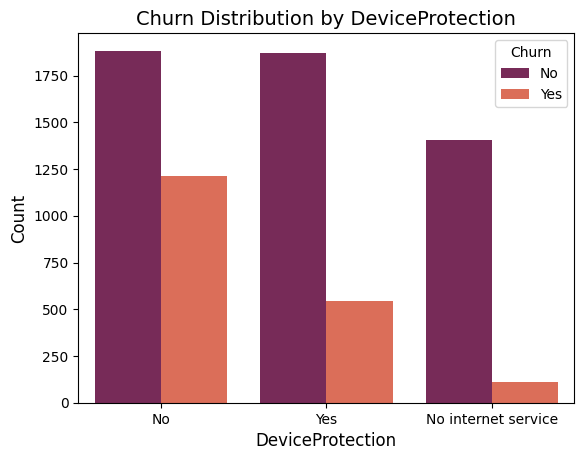

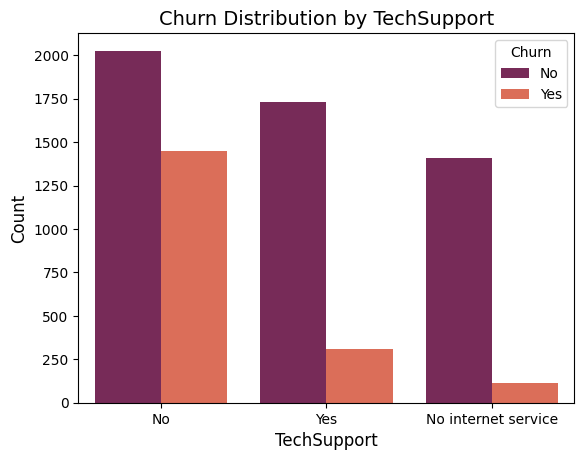

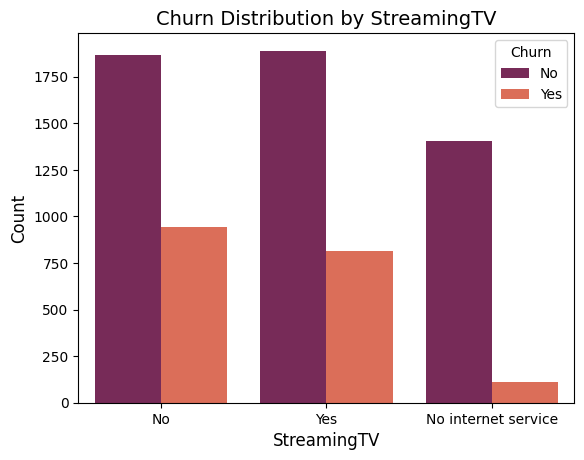

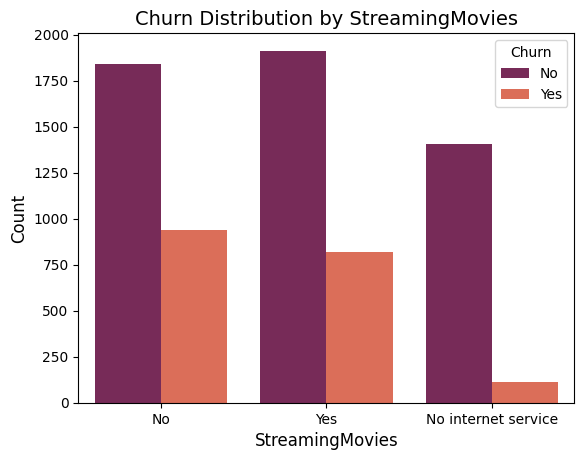

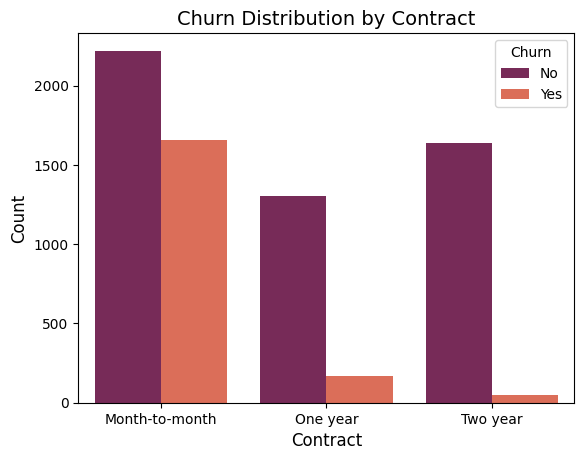

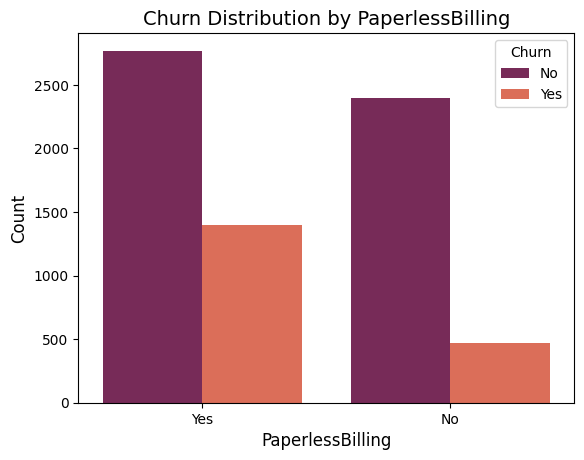

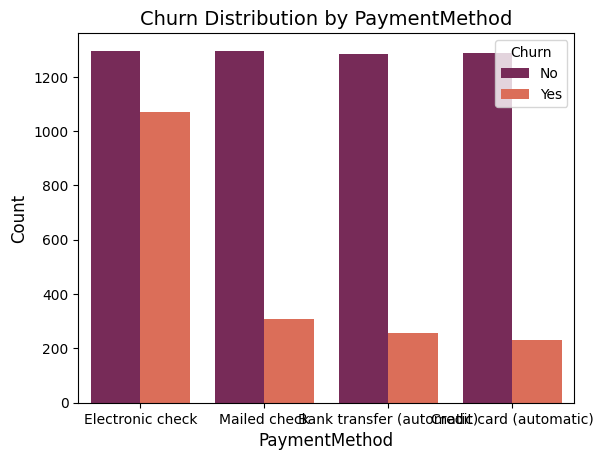

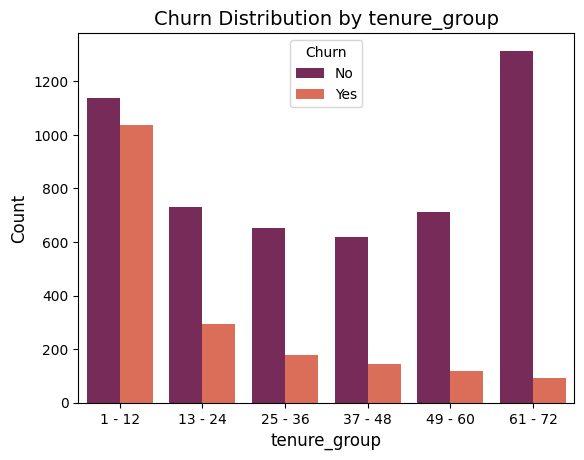

In [70]:
for i,predictor in enumerate(df_copy.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = df_copy, x = predictor, hue = 'Churn',palette='rocket')
    plt.title(f"Churn Distribution by {predictor}", fontsize=14)
    plt.xlabel(predictor, fontsize=12)
    plt.ylabel("Count", fontsize=12)

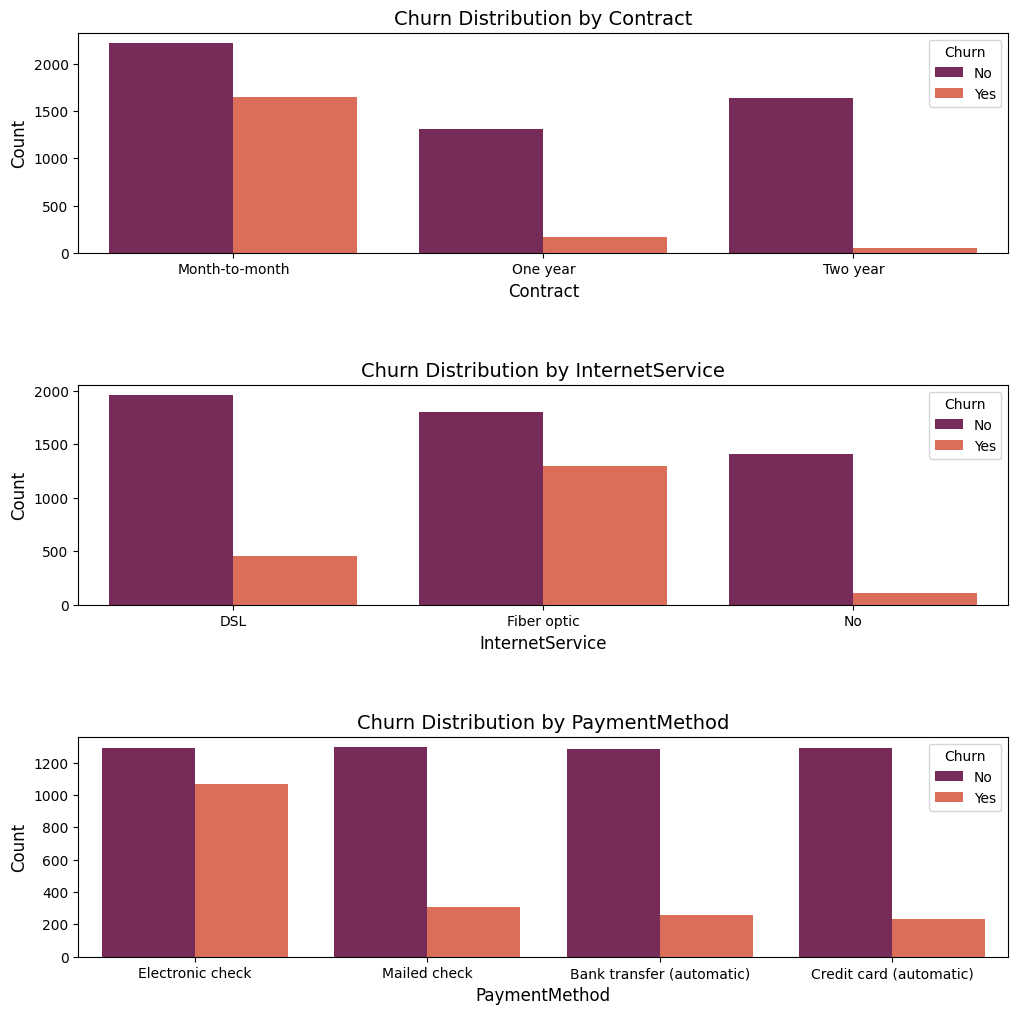

In [71]:
predictors = ['Contract', 'InternetService', 'PaymentMethod']

# Set figure size dynamically based on the number of plots
plt.figure(figsize=(12, len(predictors) * 4))

# Loop through each predictor and create a count plot
for i, predictor in enumerate(predictors):
    plt.subplot(len(predictors), 1, i + 1)  # Arrange subplots in a single column
    sns.countplot(data=df_copy, x=predictor, hue='Churn', palette='rocket')

    plt.title(f"Churn Distribution by {predictor}", fontsize=14)
    plt.xlabel(predictor, fontsize=12)
    plt.ylabel("Count", fontsize=12)


# Adjust layout to prevent overlapping
plt.subplots_adjust(hspace=0.6)
plt.show()

Converting Churn into Binary numerical values i.e - Yes = 1; No = 0.

In [72]:
df_copy['Churn'] = np.where(df_copy.Churn == 'Yes',1,0)


In [73]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


Convert all the columns to dummy variables.

In [74]:
df_dummies = pd.get_dummies(df_copy, dtype=int)
df_dummies.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


relation between monthly charges and total charges.


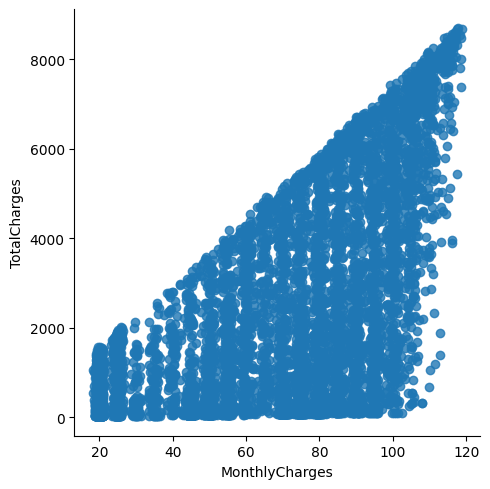

In [75]:
sns.lmplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges',fit_reg=False)

Total charges increases as monthly charges increases.

## ⭐ Churn by Monthly charges and Total charges.

1. Churn by Monthly charges

Text(0.5, 1.0, 'Monthly charges by churn')

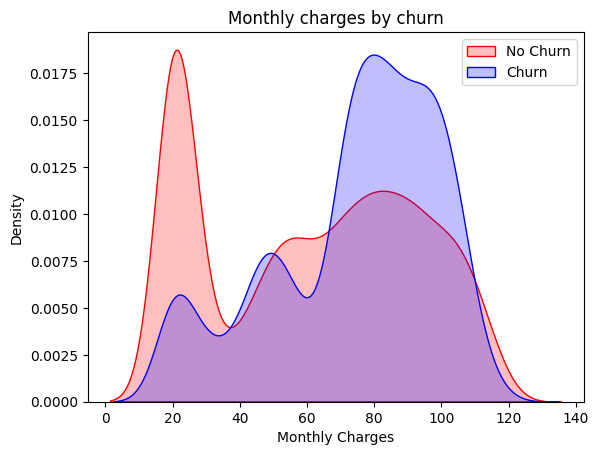

In [76]:
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

As expected Churn is high when monthy charges are high.

2. Churn by Total Charges

Text(0.5, 1.0, 'Total charges by churn')

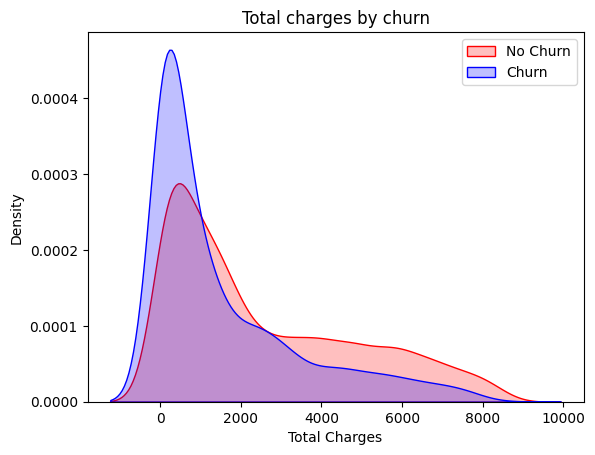

In [77]:
Mth = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')

**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.



Build a corelation of all predictor with Churn.

<Axes: >

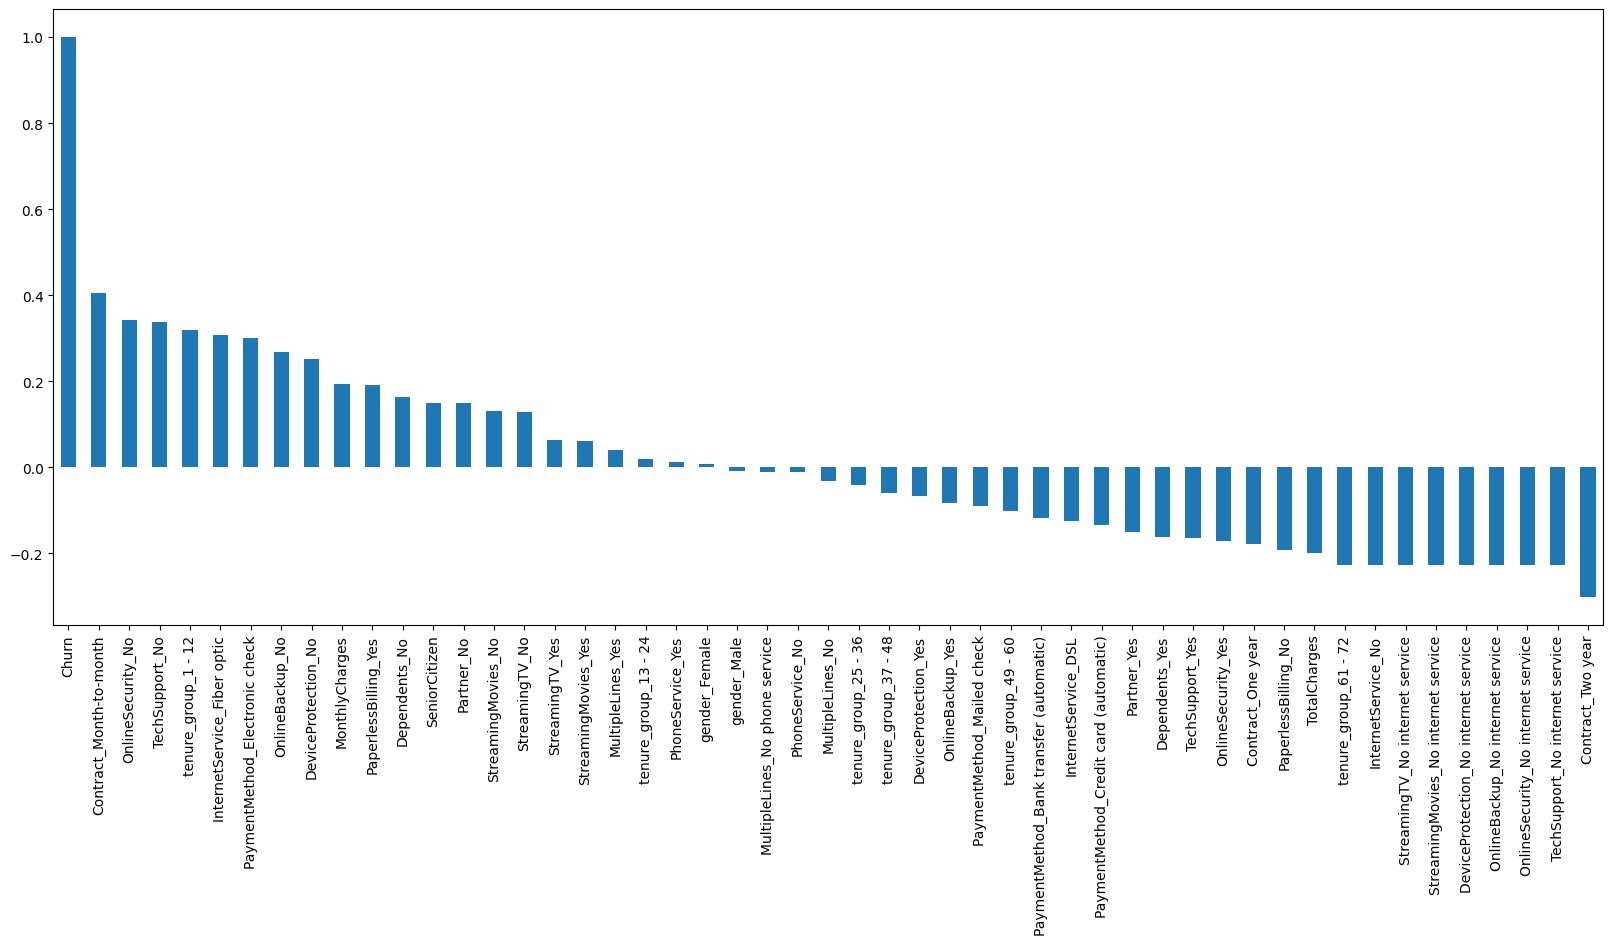

In [78]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight: **

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

Lets cross check it with heatmap.

<Axes: >

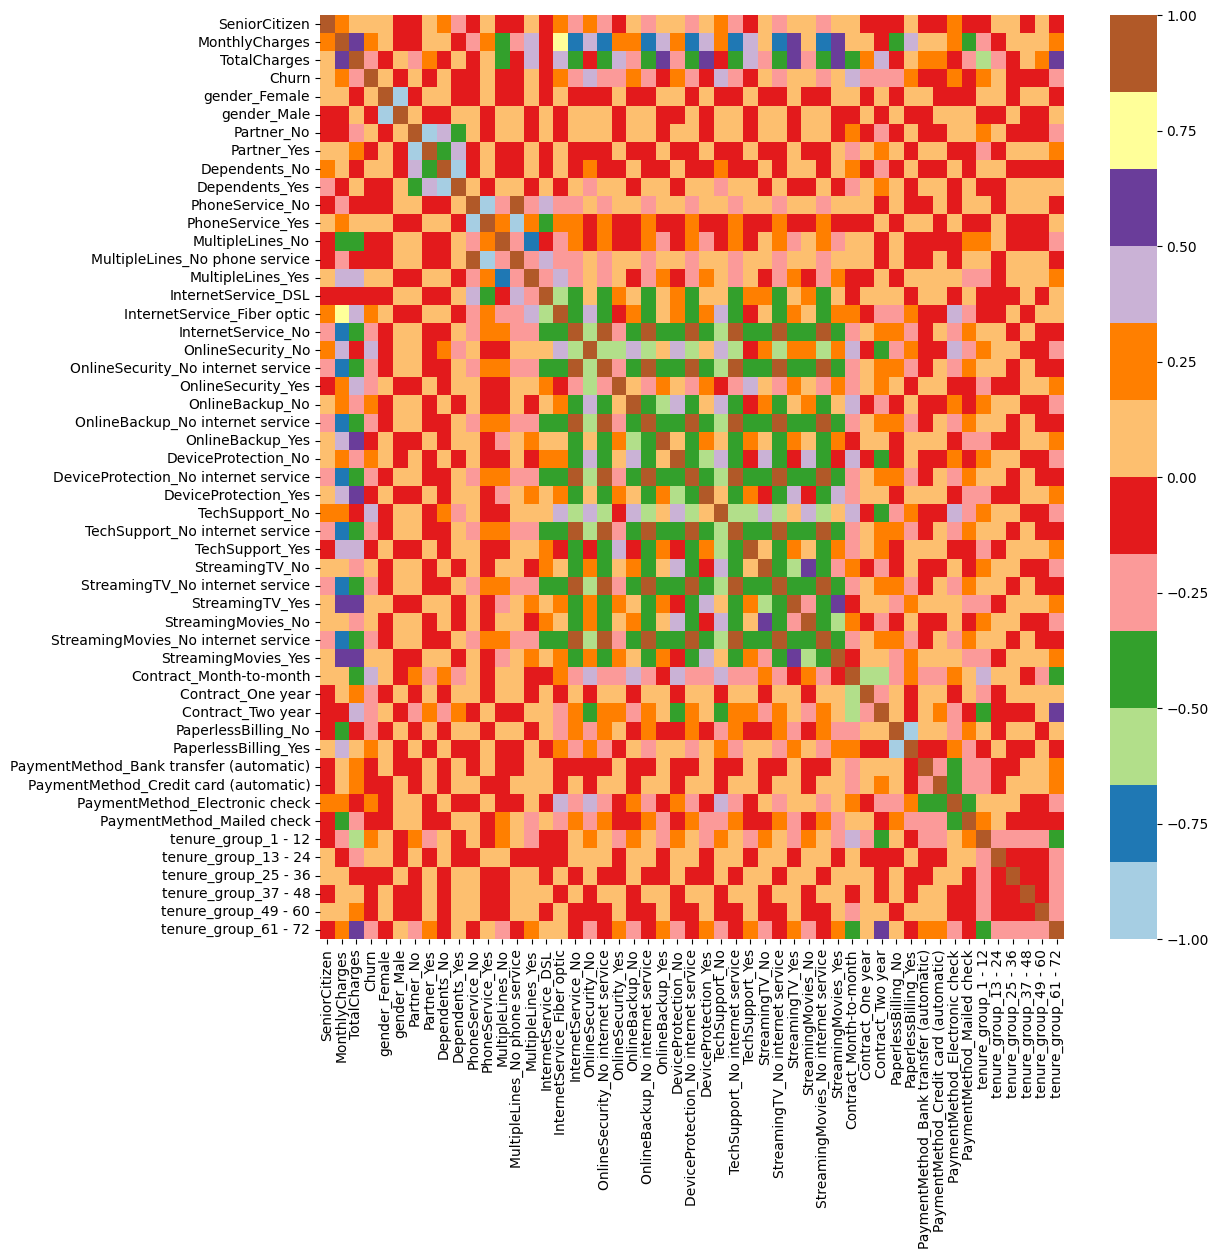

In [79]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap='Paired')

# Model Building Section

## Collecting Required Libraries

In [80]:
df_dummies.to_csv('Refined_Telco_Data.csv')

In [121]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_val_score

In [122]:
df = pd.read_csv('/content/Refined_Telco_Data.csv')

In [123]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [124]:
df = df.drop('Unnamed: 0', axis=1)

In [125]:
df.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Creating X & Y Variables

In [126]:
# X
x = df.drop('Churn', axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [127]:
# Y
y = df['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


In [128]:
# creating training and testing split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [168]:
x_train.shape, x_test.shape

((5625, 50), (1407, 50))

## Using a Decision Tree Classifier for the Model

In [129]:
model_dt = DecisionTreeClassifier(
    criterion="gini",
    random_state=100,
    max_depth=6,
    min_samples_leaf=8,
    class_weight='balanced'
)

In [130]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [131]:
y_pred = model_dt.predict(x_test)

In [132]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [133]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1013
           1       0.52      0.75      0.62       394

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.74      0.75      1407



In [134]:
cm = confusion_matrix(y_test, y_pred)

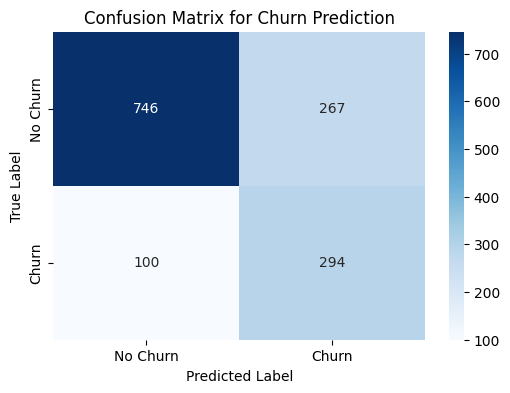

In [135]:
# Plot the matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix for Churn Prediction")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [136]:
print(confusion_matrix(y_test, y_pred))

[[746 267]
 [100 294]]


In [137]:
scores = cross_val_score(model_dt, x_train, y_train, cv=5, scoring='f1')

print("Cross-validation F1-scores:", scores)
print("Average F1-score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation F1-scores: [0.57370518 0.59398496 0.62002743 0.58869908 0.62009804]
Average F1-score: 0.5993029391809014
Standard deviation: 0.01820938725401666


## SMOTE-ENN

In [138]:
sm = SMOTEENN()
X_resampled, Y_resampled = sm.fit_resample(x, y)

In [139]:
xre_train, xre_test, yre_train, yre_test = train_test_split(X_resampled, Y_resampled, test_size=0.2)

In [140]:
model_dt_smote = DecisionTreeClassifier(
    criterion="gini",
    random_state=100,
    max_depth=6,
    min_samples_leaf=8,
    class_weight='balanced'
)

In [141]:
model_dt_smote.fit(xre_train, yre_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [142]:
y_pred_smote = model_dt_smote.predict(xre_test)

In [143]:
print(classification_report(yre_test, y_pred_smote, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       531
           1       0.95      0.91      0.93       649

    accuracy                           0.92      1180
   macro avg       0.92      0.92      0.92      1180
weighted avg       0.92      0.92      0.92      1180



In [144]:
cm = confusion_matrix(yre_test, y_pred_smote)

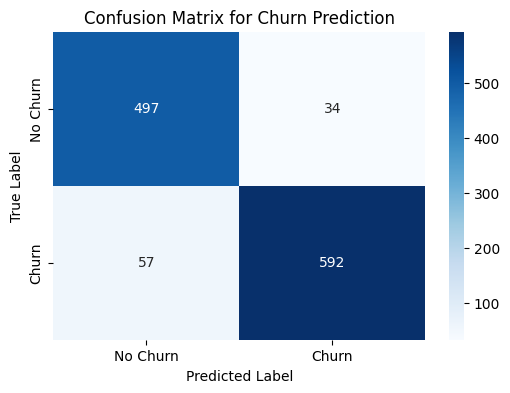

In [145]:
# Ploting the matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix for Churn Prediction")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [146]:
print(confusion_matrix(yre_test, y_pred_smote))

[[497  34]
 [ 57 592]]


In [147]:
scores = cross_val_score(model_dt, xre_train, yre_train, cv=5, scoring='f1')

print("Cross-validation F1-scores:", scores)
print("Average F1-score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation F1-scores: [0.92809204 0.92730845 0.93050193 0.93617021 0.93633692]
Average F1-score: 0.9316819115949526
Standard deviation: 0.0038786774923142606


## Comparing Results Using a Random Forest Classifier

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
model_rf = RandomForestClassifier(
    n_estimators=100,  # Number of trees.
    criterion="gini",
    random_state=100,
    max_depth=6,
    min_samples_leaf=8
)

In [155]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [156]:
y_pred_rf = model_rf.predict(x_test)

In [157]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1013
           1       0.52      0.75      0.62       394

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.74      0.75      1407



In [158]:
print(confusion_matrix(y_test, y_pred))

[[746 267]
 [100 294]]


Trying with SMOTE-ENN

In [160]:
sm = SMOTEENN()
X_resampled, Y_resampled = sm.fit_resample(x, y)

In [161]:
xre_train, xre_test, yre_train, yre_test = train_test_split(X_resampled, Y_resampled, test_size=0.2)

In [162]:
model_rf_smote = RandomForestClassifier(
    n_estimators=100,  # Number of trees.
    criterion="gini",
    random_state=100,
    max_depth=6,
    min_samples_leaf=8
)

In [163]:
model_rf_smote.fit(xre_train, yre_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [164]:
y_pred_smote_rf = model_rf_smote.predict(xre_test)

In [165]:
print(classification_report(yre_test, y_pred_smote_rf, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.94      0.88      0.90       538
           1       0.90      0.95      0.93       644

    accuracy                           0.92      1182
   macro avg       0.92      0.91      0.92      1182
weighted avg       0.92      0.92      0.92      1182



In [167]:
print(confusion_matrix(yre_test, y_pred_smote_rf))

[[471  67]
 [ 32 612]]


# Saveing model using Pickle

In [174]:
import pickle

In [175]:
filename = 'model_rf.sav'

In [176]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [177]:
load_model = pickle.load(open(filename, 'rb'))

In [178]:
load_model.score(xre_test, yre_test)

0.916243654822335

In [179]:
filename = 'model_dt.sav'

In [180]:
pickle.dump(model_dt_smote, open(filename, 'wb'))

In [181]:
load_model = pickle.load(open(filename, 'rb'))

In [182]:
load_model.score(xre_test, yre_test)

0.9238578680203046

# Creating a py application

In [185]:
import pickle
import pandas as pd
import numpy as np

# Load the pre-trained model
with open('model_dt.sav', 'rb') as file:
    model_dt = pickle.load(file)

# Load the training dataset to get the expected column structure
training_data = pd.read_csv('Refined_Telco_Data.csv')
expected_cols = training_data.drop(columns=['Churn', 'Unnamed: 0']).columns.tolist()  # Assuming 'Churn' is the target

# Define mappings for multi-category inputs
multi_category_mappings = {
    'MultipleLines': {
        '1': 'No',
        '2': 'No phone service',
        '3': 'Yes'
    },
    'InternetService': {
        '1': 'DSL',
        '2': 'Fiber optic',
        '3': 'No'
    },
    'OnlineSecurity': {
        '1': 'No',
        '2': 'No internet service',
        '3': 'Yes'
    },
    'OnlineBackup': {
        '1': 'No',
        '2': 'No internet service',
        '3': 'Yes'
    },
    'DeviceProtection': {
        '1': 'No',
        '2': 'No internet service',
        '3': 'Yes'
    },
    'TechSupport': {
        '1': 'No',
        '2': 'No internet service',
        '3': 'Yes'
    },
    'StreamingTV': {
        '1': 'No',
        '2': 'No internet service',
        '3': 'Yes'
    },
    'StreamingMovies': {
        '1': 'No',
        '2': 'No internet service',
        '3': 'Yes'
    },
    'Contract': {
        '1': 'Month-to-month',
        '2': 'One year',
        '3': 'Two year'
    },
    'PaymentMethod': {
        '1': 'Electronic check',
        '2': 'Mailed check',
        '3': 'Bank transfer',
        '4': 'Credit card'
    }
}

# Function to get user input with numbered options
def get_user_input():
    print("=== Enter Customer Details for Churn Prediction ===")

    input_data = {}

    # Numerical features
    input_data['SeniorCitizen'] = int(input("SeniorCitizen (0 or 1): "))
    input_data['MonthlyCharges'] = float(input("MonthlyCharges (e.g., 29.85): "))
    input_data['TotalCharges'] = float(input("TotalCharges (e.g., 29.85): "))
    input_data['tenure'] = int(input("Tenure (months, e.g., 1): "))

    # Binary categorical features (Yes/No)
    input_data['gender'] = input("Gender (Male/Female): ").capitalize()
    input_data['Partner'] = input("Partner (Yes/No): ").capitalize()
    input_data['Dependents'] = input("Dependents (Yes/No): ").capitalize()
    input_data['PhoneService'] = input("PhoneService (Yes/No): ").capitalize()
    input_data['PaperlessBilling'] = input("PaperlessBilling (Yes/No): ").capitalize()

    # Multi-category features with numbered options
    for col, options in multi_category_mappings.items():
        print(f"\n{col} options:")
        for num, val in options.items():
            print(f"  {num}: {val}")
        choice = input(f"Enter number for {col}: ")
        input_data[col] = options.get(choice, options['1'])  # Default to first option if invalid

    return input_data

# Function to preprocess input
def preprocess_input(input_data):
    # Convert to DataFrame (1 row)
    df = pd.DataFrame([input_data])

    # Binary encoding (Yes/No to 1/0)
    binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
    for col in binary_cols:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

    # Gender encoding (Male=0, Female=1)
    df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

    # One-hot encoding for multi-category features
    multi_cols = list(multi_category_mappings.keys())
    df_encoded = pd.get_dummies(df, columns=multi_cols, dtype=int)

    # Add missing columns with 0s to match training data
    for col in expected_cols:
        if col not in df_encoded.columns:
            df_encoded[col] = 0

    # Reorder columns to match training data exactly
    df_encoded = df_encoded[expected_cols]

    return df_encoded

# Main function to run the application
def run_churn_prediction_app():
    while True:
        print("\n=== Churn Prediction Application ===")

        # Get user input
        raw_input = get_user_input()

        # Preprocess input
        processed_input = preprocess_input(raw_input)

        # Make prediction
        prediction = model_dt.predict(processed_input)
        probability = model_dt.predict_proba(processed_input)[0]

        # Interpret result
        result = "likely to churn" if prediction[0] == 1 else "not likely to churn"
        churn_prob = probability[1] * 100  # Probability of churn (class 1)

        # Display result
        print("\n=== Prediction Result ===")
        print(f"The customer is {result}.")
        print(f"Probability of churn: {churn_prob:.2f}%")

        # Ask if user wants to predict again
        again = input("\nDo you want to predict for another customer? (yes/no): ").lower()
        if again != 'yes':
            print("Thank you for using the Churn Prediction App!")
            break

# Run the app
if __name__ == "__main__":
    run_churn_prediction_app()


=== Churn Prediction Application ===
=== Enter Customer Details for Churn Prediction ===
SeniorCitizen (0 or 1): 0
MonthlyCharges (e.g., 29.85): 45.76
TotalCharges (e.g., 29.85): 45.76
Tenure (months, e.g., 1): 5
Gender (Male/Female): male
Partner (Yes/No): yes
Dependents (Yes/No): no
PhoneService (Yes/No): yes
PaperlessBilling (Yes/No): yes

MultipleLines options:
  1: No
  2: No phone service
  3: Yes
Enter number for MultipleLines: 3

InternetService options:
  1: DSL
  2: Fiber optic
  3: No
Enter number for InternetService: 1

OnlineSecurity options:
  1: No
  2: No internet service
  3: Yes
Enter number for OnlineSecurity: 3

OnlineBackup options:
  1: No
  2: No internet service
  3: Yes
Enter number for OnlineBackup: 3

DeviceProtection options:
  1: No
  2: No internet service
  3: Yes
Enter number for DeviceProtection: 3

TechSupport options:
  1: No
  2: No internet service
  3: Yes
Enter number for TechSupport: 3

StreamingTV options:
  1: No
  2: No internet service
  3: 